In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor

import seaborn as sns
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

import os

import matplotlib.pyplot as plt

In [2]:
df = []
for data in os.listdir('/kaggle/input/mental-health-dataset/'):
    df1 = pd.read_csv('/kaggle/input/mental-health-dataset/'+data)
    df.append(df1)
df[5]

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.193166
6836,Zimbabwe,ZWE,2016,2.279813
6837,Zimbabwe,ZWE,2017,2.364265
6838,Zimbabwe,ZWE,2018,2.472949


In [3]:
for i in range(len(df)):
    #print(list(i.columns))
    #print("\n")
    df[i].fillna(method ='ffill',axis = 0,inplace=True )
    df[i].dropna(axis = 0,inplace=True )
    df[i].drop('Entity', axis=1, inplace =True)

In [4]:
df[0].columns = [ 'Code', 'Year',
       'Schizophrenia',
       'Bipolar disorder',
       'Eating disorders',
       'Anxiety disorders',
       'Drug use disorders',
       'Depressive disorders',
       'Alcohol use disorders ']

df[1].columns = ['Code', 'Year',
       'Mental disorders']

df[2].columns = ['Code', 'Year',
       'Depressive disorders - Male',
       'Depressive disorders - Female',
       'Population', 'Continent']

df[3].columns = [ 'Code', 'Year',
       'Mental and substance use disorders - Male',
       'Mental and substance use disorders - Female',
       'Population', 'Continent']

df[4].columns = [ 'Code', 'Year',
       'Depressive disorders']

df[5].columns = [ 'Code', 'Year',
       'Disability-Adjusted Life Years']

In [5]:
for i in range(len(df)):
    print('data: '+str(i+1)+'\n')
    print(list(df[i].columns[2:]))
    print(len(df[i]))
    print('\n')

data: 1

['Schizophrenia', 'Bipolar disorder', 'Eating disorders', 'Anxiety disorders', 'Drug use disorders', 'Depressive disorders', 'Alcohol use disorders ']
6840


data: 2

['Mental disorders']
6780


data: 3

['Depressive disorders - Male', 'Depressive disorders - Female', 'Population', 'Continent']
56394


data: 4

['Mental and substance use disorders - Male', 'Mental and substance use disorders - Female', 'Population', 'Continent']
56628


data: 5

['Depressive disorders']
6780


data: 6

['Disability-Adjusted Life Years']
6840




* ### Correlation bettween all diseases from df 1
* ### Male vs Female in Depressive disorders and Mental and substance use disorders
* ### All diseases plot vs years df 1/2/5
* ### All diseases plot vs country
* ### DALY vs diseases df 1/2/5

# Correlation bettween all diseases from df 1

In [6]:
corr = df[0].corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders
Year,1.000000,0.046543,0.013536,0.079822,0.043084,0.053236,-0.035427,-0.006759
Schizophrenia,0.046543,1.000000,0.200035,0.567001,0.395485,0.647464,-0.362826,0.327868
Bipolar disorder,0.013536,0.200035,1.000000,0.712130,0.620014,0.421331,0.206731,0.361718
Eating disorders,0.079822,0.567001,0.712130,1.000000,0.645671,0.679770,0.053520,0.379949
Anxiety disorders,0.043084,0.395485,0.620014,0.645671,1.000000,0.452157,0.162404,0.170741
Drug use disorders,0.053236,0.647464,0.421331,0.679770,0.452157,1.000000,-0.060790,0.485653
Depressive disorders,-0.035427,-0.362826,0.206731,0.053520,0.162404,-0.060790,1.000000,-0.007679
Alcohol use disorders,-0.006759,0.327868,0.361718,0.379949,0.170741,0.485653,-0.007679,1.000000


* corr: Schizophrenia and Eating disorders
* corr: Schizophrenia and Drug use disorders
* corr: Bipolar disorder and Eating disorders
* corr: Bipolar disorder and Anxiety disorders
* corr: Eating disorders and Anxiety disorders 
* corr: Eating disorders and Drug use disorders

* Depressive disorders and Alcohol use disorders don't correlate with any other mental health issue.
* Schizophrenia and Bipolar disorder and Eating disorders can cause other mental ussies.

# Male vs Female in Depressive disorders

## Depressive disorders

In [7]:
df[2]

,Code,Year,Depressive disorders - Male,Depressive disorders - Female,Population,Continent
1,AFG,1990,4.291054,5.859656,12412311.0,Asia
2,AFG,1991,4.293268,5.853078,13299016.0,Asia
3,AFG,1992,4.298265,5.850020,14485543.0,Asia
4,AFG,1993,4.303087,5.844987,15816601.0,Asia
5,AFG,1994,4.306053,5.843623,17075728.0,Asia
...,...,...,...,...,...,...
56390,ZWE,1988,3.080472,3.941506,9849129.0,Africa
56391,ZWE,1989,3.080472,3.941506,10153852.0,Africa
56392,ZWE,2020,3.080472,3.941506,14862927.0,Africa
56393,ZWE,2021,3.080472,3.941506,15092171.0,Africa


In [8]:
M = df[2]['Depressive disorders - Male'].sum()/len(df[2])
M

3.1516488466119936

In [9]:
F = df[2]['Depressive disorders - Female'].sum()/len(df[2])
F

4.662427068589373

In [10]:
F/M

1.479361215511512

### Female are 1.5 more to have Depressive disorders.

### Male vs Female in substance use disorders

In [11]:
df[3]

,Code,Year,Mental and substance use disorders - Male,Mental and substance use disorders - Female,Population,Continent
1,AFG,1990,17.448695,17.634233,12412311.0,Asia
2,AFG,1991,17.771263,17.873184,13299016.0,Asia
3,AFG,1992,18.051575,18.092318,14485543.0,Asia
4,AFG,1993,18.275848,18.265196,15816601.0,Asia
5,AFG,1994,18.427490,18.383394,17075728.0,Asia
...,...,...,...,...,...,...
56624,ZWE,2018,12.561063,10.740696,14438812.0,Africa
56625,ZWE,2019,12.561063,10.740696,14645473.0,Africa
56626,ZWE,2020,12.561063,10.740696,14862927.0,Africa
56627,ZWE,2021,12.561063,10.740696,15092171.0,Africa


In [12]:
M = df[3]['Mental and substance use disorders - Male'].sum()/len(df[3])
M

12.496554048621885

In [13]:
F = df[3]['Mental and substance use disorders - Female'].sum()/len(df[3])
F

13.18523469220922

In [14]:
F/M

1.0551096438992542

### Female are little bit more to have Depressive disorders.

# All diseases plot vs years

In [15]:
years = df[0].groupby('Year').mean()
years.head()

,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders
Year,,,,,,,
1990,0.278066,0.668309,0.195310,4.254095,0.695275,3.976425,1.568588
1991,0.278254,0.668588,0.195578,4.256147,0.701246,3.976146,1.568846
1992,0.278431,0.668887,0.195944,4.258389,0.706803,3.976241,1.569742
1993,0.278592,0.669190,0.196371,4.260634,0.711898,3.976523,1.571344
1994,0.278729,0.669495,0.196850,4.262858,0.716157,3.977223,1.573282


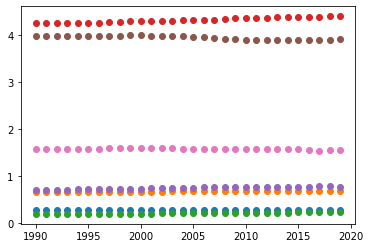

In [16]:
for i in years.columns:
    plt.scatter(years.index, years[str(i)])

In [17]:
years2 = df[1].groupby('Year').mean()
years2.head()

,Mental disorders
Year,
1990,13.372666
1991,13.378784
1992,13.384990
1993,13.390664
1994,13.395535


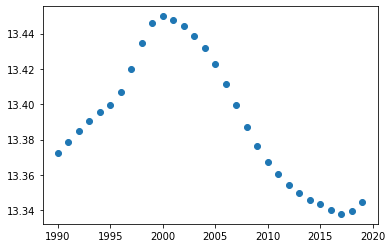

In [18]:
for i in years2.columns:
    plt.scatter(years2.index, years2[str(i)])

In [19]:
years3 = df[4].groupby('Year').mean()
years3.head()

,Depressive disorders
Year,
1990,3.988859
1991,3.988706
1992,3.988921
1993,3.989313
1994,3.990135


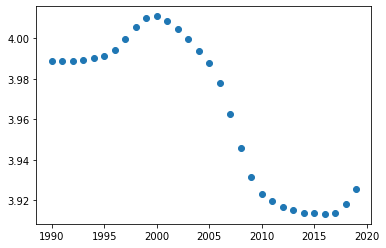

In [20]:
for i in years3.columns:
    plt.scatter(years3.index, years3[str(i)])

# All diseases plot vs country

In [21]:
country = df[0].groupby('Code').mean().drop('Year', axis = 1)
country.head()

,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders
Code,,,,,,,
AFG,0.220437,0.651745,0.106661,4.194898,0.460596,4.899129,0.780531
AGO,0.217549,0.560313,0.116408,4.016852,0.357315,5.912724,1.155316
ALB,0.301066,0.576012,0.121142,3.968011,0.470679,2.586824,1.726101
AND,0.316339,1.024928,0.547938,5.945778,1.038234,3.947859,2.260065
ARE,0.294783,0.783399,0.329909,4.337508,0.686818,3.847843,0.591822


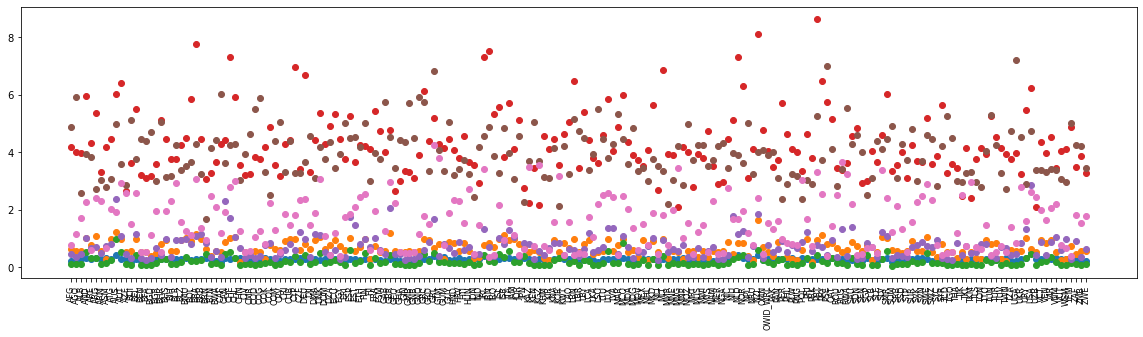

In [22]:
plt.figure(figsize=(20, 5))
for i in country.columns:
    plt.scatter(country.index, country[str(i)])
    plt.xticks(rotation = 90,fontsize = 8)


In [23]:
country2 = df[1].groupby('Code').mean().drop('Year', axis = 1)
country2.head()

,Mental disorders
Code,
AFG,14.897484
AGO,13.520008
ALB,11.629745
AND,15.413481
ARE,12.437468


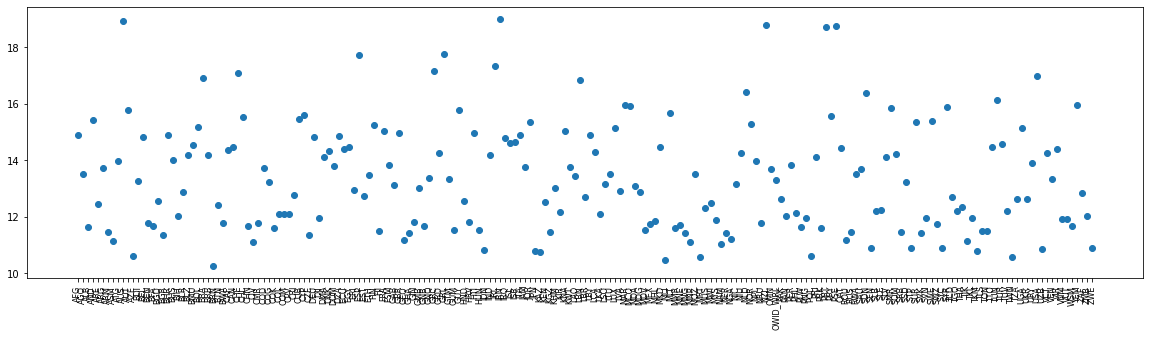

In [24]:
plt.figure(figsize=(20, 5))
for i in country2.columns:
    plt.scatter(country2.index, country2[str(i)])
    plt.xticks(rotation = 90,fontsize = 8)

In [25]:
country3 = df[4].groupby('Code').mean().drop('Year', axis = 1)
country3.head()

,Depressive disorders
Code,
AFG,4.899129
AGO,5.912724
ALB,2.586824
AND,3.947859
ARE,3.847843


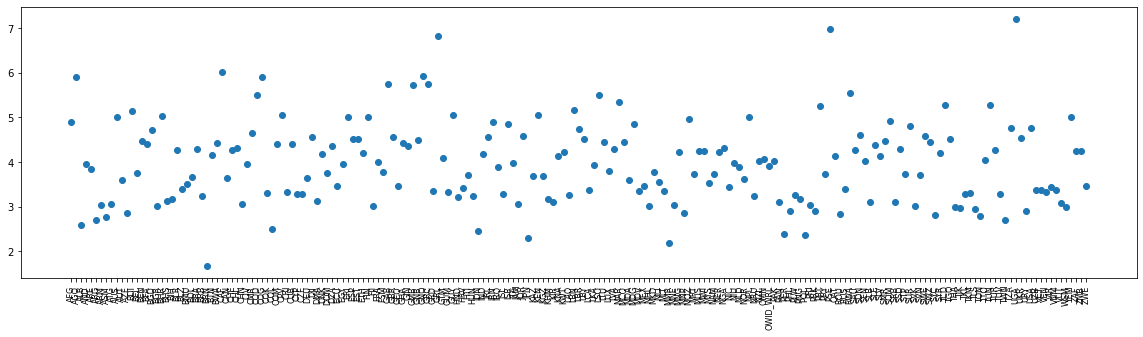

In [26]:
plt.figure(figsize=(20, 5))
for i in country3.columns:
    plt.scatter(country3.index, country3[str(i)])
    plt.xticks(rotation = 90,fontsize = 8)

# DALY vs diseases df 1/2/5

### Merging

In [27]:
merged = df[0].merge(df[1], on=["Code", "Year"]).merge(df[5], on=["Code", "Year"])
merged.head()

,Code,Year,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders,Mental disorders,Disability-Adjusted Life Years
0,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,16.659229,1.696670
1,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,16.659229,1.417621
2,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,12.411191,1.696670
3,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,12.411191,1.417621
4,AFG,1990,0.216352,0.581938,0.102983,3.537832,0.437110,4.725167,1.152445,16.659229,1.696670


### Modeling 

In [28]:
target = 'Disability-Adjusted Life Years'

In [29]:
def label_encoding(old_column):
    le = LabelEncoder()
    le.fit(old_column)
    new_column = le.transform(old_column)
    return new_column
for i in merged.columns:
    if type(merged[i][0]) == str:
        merged[i] = label_encoding(merged[i])
        
#extracting x and y
y = merged[target].values
 
x = merged.drop([target], axis=1).values

#spliting  data
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)



In [30]:
model_2 = XGBRegressor()

params = {  
        "n_estimators": st.randint(3, 40),
        "max_depth": st.randint(3, 40),
        "learning_rate": st.uniform(0.05, 0.4),
        "colsample_bytree": st.beta(10, 1),
        "subsample": st.beta(10, 1),
        "gamma": st.uniform(0, 10),
        'scale_pos_weight': st.randint(0, 2),
        "min_child_weight": st.expon(0, 50),

    }

# Random Search Training with 5 folds Cross Validation
clf2 = RandomizedSearchCV(model_2, params, cv=5,
                     n_jobs=1, n_iter=100) 

clf2.fit(X_train, y_train)  

pred = clf2.predict(X_test)
results = mean_squared_error(pred, y_test)
print(results)

1.4518592932896568


In [31]:
filename = 'clf2.sav'
pickle.dump(clf2, open(filename, 'wb'))

In [32]:
ls

__notebook__.ipynb  clf2.sav
